In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg

## The quadratic form in algbebra

In [ ]:
A = [[1,2,3],
     [3,1,0],
     [0,0,1]]

w = np.transpose([[1,10,3]]) # column vector # you can change this elements and see the differences

qud = w.T@A@w

print(qud)

[[169]]


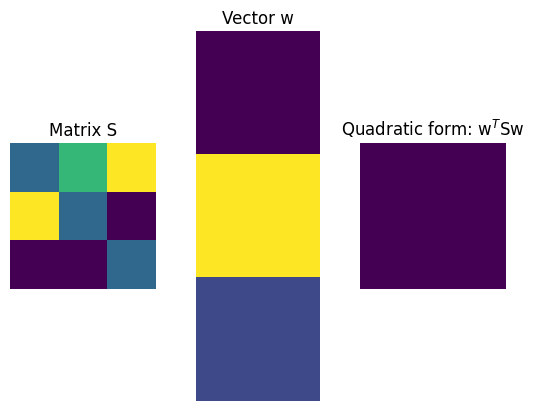

In [ ]:
n = len(w) # used for plotting

# show the matrices
plt.subplot(131)
plt.imshow(A)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qud)
plt.title('Quadratic form: w$^T$Sw')
plt.axis('off')

plt.show()

## The quadratic form in geometry

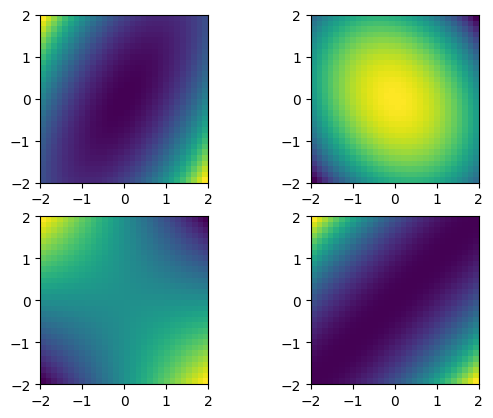

In [ ]:
# Some different matrices
S = np.zeros((4,), dtype=object) #Array of array

S[0] = [ [4,4], [4,9]]
S[1] = [ [-4,-1], [3,-5]]
S[2] = [ [0,1], [2,0]]
S[3] = [ [1,1], [1,1]]

#range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n))

#np.shape(qf)

for i in range(4):
    #compute qf
    for xi in range(n):
        for yi in range(n):
            #this w
            w = np.transpose([wRange[xi], wRange[yi]]) #numpy array banako

            #QF
            qf[xi,yi] =w.T@S[i]@w
    #show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf,extent=[wRange[0], wRange[-1], wRange[0], wRange[-1]])

plt.show()

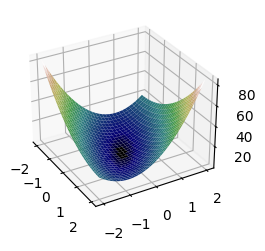

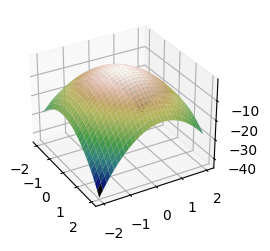

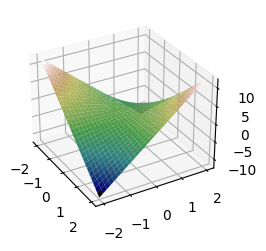

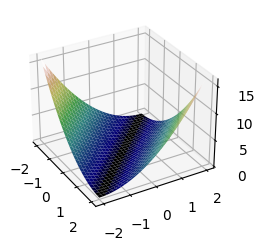

In [ ]:
# 3D plotting code

mycmap = plt.get_cmap('gist_earth')

for i in range(4):
    for xi in range(n):
        for yi in range(n):
            w = np.transpose([wRange[xi],wRange[yi]])
            qf[xi,yi] = w.T@S[i]@w

    X,Y = np.meshgrid(wRange,wRange)
    Z = qf.T

    #show the map
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i,projection ='3d')
    surf1 = ax1.plot_surface(X,Y,Z, cmap = mycmap)
    ax1.view_init(azim = -30, elev=30)

plt.show()


### Code challenge: Visualize the normalized quadratic form

[-2.         -1.86206897 -1.72413793 -1.5862069  -1.44827586 -1.31034483
 -1.17241379 -1.03448276 -0.89655172 -0.75862069 -0.62068966 -0.48275862
 -0.34482759 -0.20689655 -0.06896552  0.06896552  0.20689655  0.34482759
  0.48275862  0.62068966  0.75862069  0.89655172  1.03448276  1.17241379
  1.31034483  1.44827586  1.5862069   1.72413793  1.86206897  2.        ]


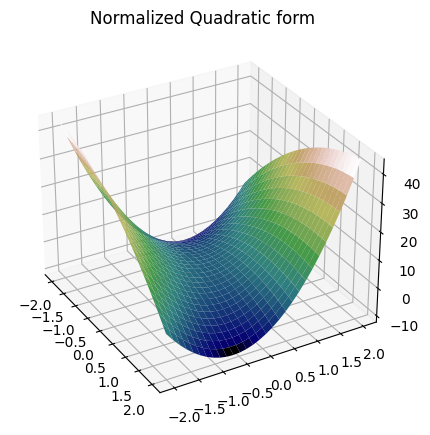

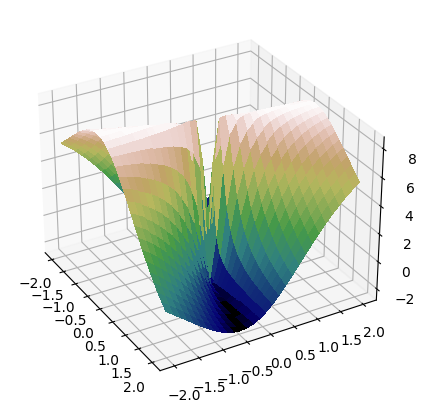

[[-2  3]
 [ 2  8]]
[2. 2.]


In [ ]:
S = np.array([[-2,3],[2,8]])

n = 30
xi = np.linspace(-2,2,n)
print(xi)

#for viualization
X, Y = np.meshgrid(xi,xi)

#initialize
qf = np.zeros((n,n))
nqf = np.zeros((n,n))


for i in range(n):
    for j in range(n):
        #create w vector
        w = np.transpose([xi[i],xi[j]])

        #compute quadratic forms
        qf[i,j] = w.T@S@w
        nqf[i,j] = (w.T@S@w) / (w.T@w)


#show the map
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection = '3d')
surfac1 = ax1.plot_surface(X,Y,qf.T,cmap=mycmap)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Non normalized Quadratic form')

fig = plt.figure(figsize=(5,5))
ax2 = fig.add_subplot(111, projection = '3d')
surfac2 = ax2.plot_surface(X,Y,nqf.T, cmap=mycmap, antialiased = False)
ax2.view_init(azim=-30, elev=30)
ax1.set_title('Normalized Quadratic form')

plt.show()

print(S)

print(w)





```
They look different.
```



## Eigenvectors and the quadratic form surface

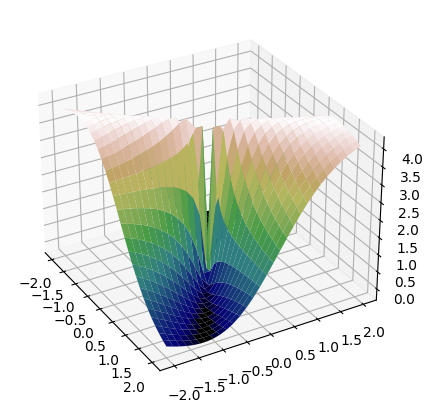

In [ ]:
A = [[1,2],[2,3]]#symmetric matrix

n = 30
wi = np.linspace(-2,2,n)

nqf =  np.zeros((n,n))
X,Y = np.meshgrid(wi,wi)
for i in range(n):
    for j in range(n):
        w = np.transpose([wi[i], wi[j]])

        nqf[i,j] = (w.T@A@w)/(w.T@w) 

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111,projection='3d')
surf = ax1.plot_surface(X,Y,nqf.T, cmap=mycmap)
ax1.view_init(azim=-30, elev=30)
plt.show()

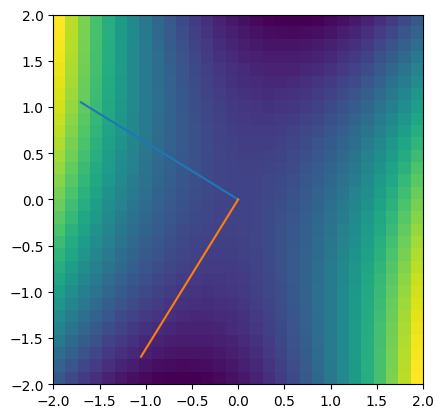

In [ ]:
D,V = np.linalg.eig(A)

V = V*2 #scale eigen vector

plt.imshow(qf,extent=[-2,2,-2,2])

plt.plot([0,V[0,0]],[0,V[1,0]])
plt.plot([0,V[0,1]],[0,V[1,1]])
plt.show()

## Application of normalized quadratic form: PCA

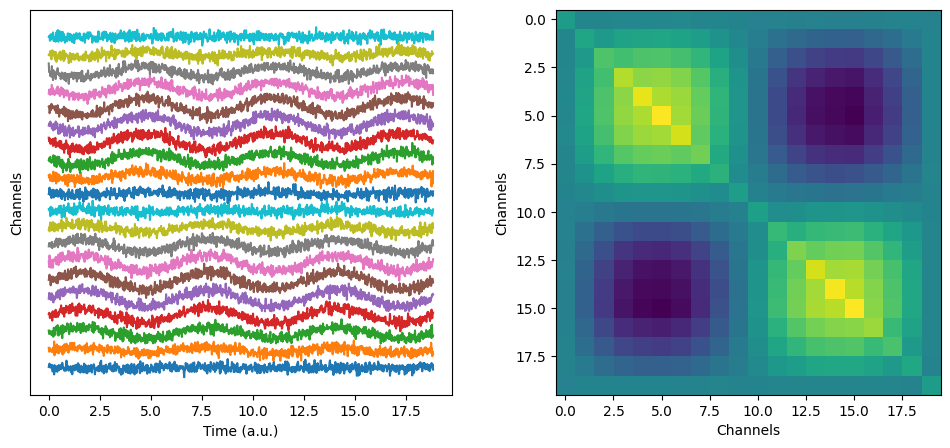

In [ ]:
# Simulation parameters
N = 1000 # time points
M = 20 # channels

# time vectors (radian units)
t = np.linspace(0,6*np.pi,N)

#relationship across channels (imposing covariance)
channel = np.sin(np.linspace(0,2*np.pi, M)) # impose spatial structure across diff channels and we are gonna see PCA can recover that str.

# initialize data
data = np.zeros((M,N))

# create dataset
for i in range(M):
    data[i,:] = np.sin(t) * channel[i]

# add noise
data = data + np.random.randn(M,N)/3

# mean- center
for i in range(M):
  data[i,:] = data[i,:] - np.mean(data[i,:])

#compute covariance matrix
covmat = data@data.T/(N-1) # this give space(channel) covariance
#covmat = data.T@data/(N-1) # this give time covariance


### show me the data!!
fig,ax = plt.subplots(1,2,figsize=(12,5))

# draw time series
for i in range(M):
    ax[0].plot(t,data[i,:]+i*2)
ax[0].set_yticks([])
ax[0].set_ylabel('Channels')
ax[0].set_xlabel('Time (a.u.)')

# show covariance matrix
ax[1].imshow(covmat)
ax[1].set_ylabel('Channels')
ax[1].set_xlabel('Channels')


plt.show()

<ipython-input-66-6c81728d57f7>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


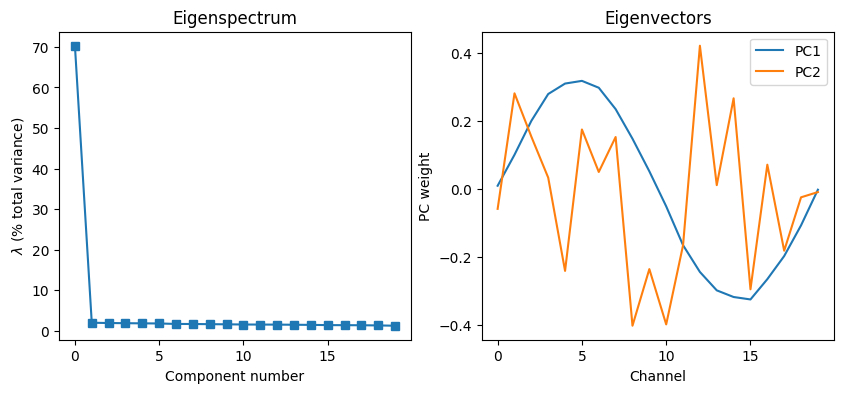

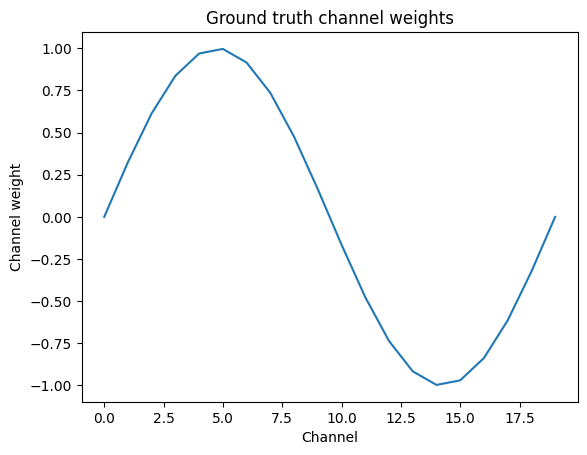

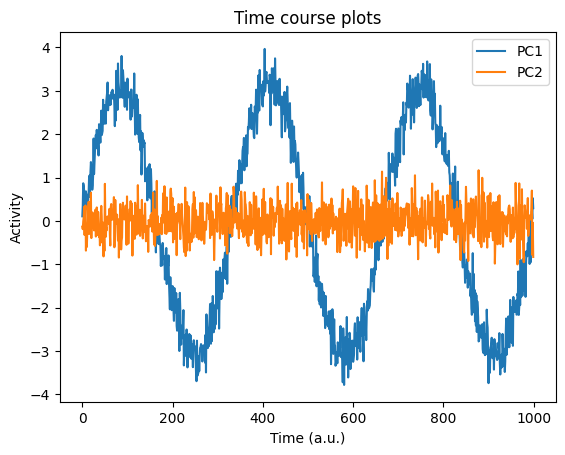

In [ ]:
# Eigen decomposition of the covariance matrix
evals, evecs = np.linalg.eig( covmat )

#sort eigenvalues and eigenvectors
idx = np.argsort(evals)[::-1]
evals = np.real( evals[idx] )
evecs = evecs[:,idx]

# convert eigenvalues to percent variance 
evals = 100*evals/np.sum(evals)

# compute component time series
r = 2 # two components
comp_time_series = evecs[:,:r].T@data

# visualize and interpret the results

fig = plt.subplots(121,figsize=(10,4))
# eigenvalues
plt.subplot(121)
plt.plot(evals,'s-')
plt.xlabel('Component number')
plt.ylabel('$\lambda$ (% total variance)')
plt.title('Eigenspectrum')

# eigenvectors
plt.subplot(122)
plt.plot(evecs[:,0],label='PC1')
plt.plot(evecs[:,1],label='PC2')
plt.xlabel('Channel')
plt.ylabel('PC weight')
plt.title('Eigenvectors')
plt.legend()
plt.show()

# original channel modulator
plt.plot(channel)
plt.xlabel('Channel')
plt.ylabel('Channel weight')
plt.title('Ground truth channel weights')
plt.show()

# component time series
plt.plot(comp_time_series[0,:],label='PC1')
plt.plot(comp_time_series[1,:],label='PC2')
plt.xlabel('Time (a.u.)')
plt.ylabel('Activity')
plt.legend()
plt.title('Time course plots')
plt.show()
              



```
PC1 is rank-1 matrix. and it is good approx. of core feature of data in compact format.
```



## Quadratic form of generalized eigendecomposition

In [ ]:
# Create two symmetric matrices
m = 14
n = 1000

# Create A as random sine-modulated noise, then its covariance matrix
A = np.zeros((m,n))
for i in range(n):
    A[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))# populate 1000 columns with 14 values at a time

print(np.shape(A)) 

A = A@A.T

B = np.zeros((m,n))
for i in range(n):
    B[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))# populate 1000 columns with 14 values at a time

#print(np.shape(A)) 
B = B@B.T

#generalized eigendecomposition
evals,evecs = linalg.eigh(A,B)

(14, 1000)


<ipython-input-74-708ae4ae382c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


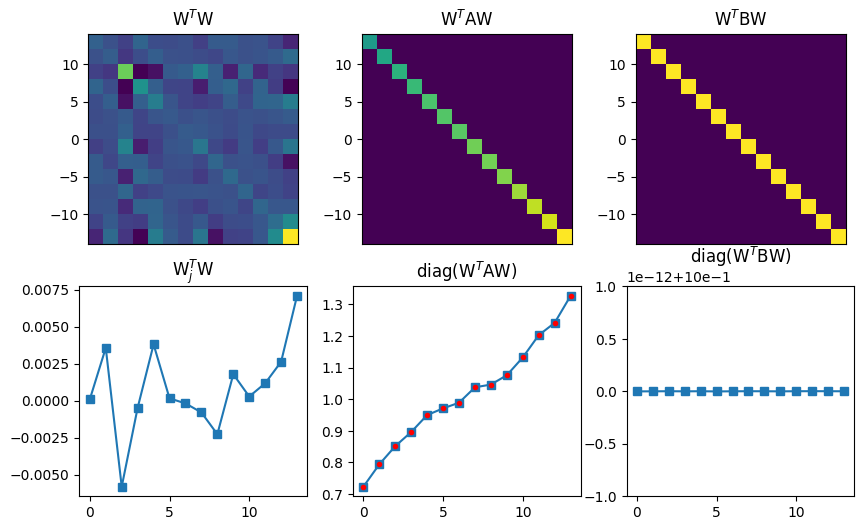

In [ ]:
## some plotting

fig = plt.subplots(1,figsize=(10,6))

# W'W
plt.subplot(231)
plt.imshow(evecs.T@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$W')

# one row of W'W
tmp = evecs.T@evecs
plt.subplot(234)
plt.plot(tmp[1,:],'s-')
plt.title('W$_j^T$W')

# W'AW
plt.subplot(232)
plt.imshow(evecs.T@A@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$AW')

# one row of W'AW
plt.subplot(235)
plt.plot(np.diag(evecs.T@A@evecs),'s-')
plt.plot(evals,'r.')
plt.title('diag(W$^T$AW)')

# W'BW
plt.subplot(233)
plt.imshow(evecs.T@B@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$BW')

# diagonal of W'BW
plt.subplot(236)
plt.plot(np.diag(evecs.T@B@evecs),'s-')
plt.title('diag(W$^T$BW)')

plt.show()

<ipython-input-75-6d6876f2abaa>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


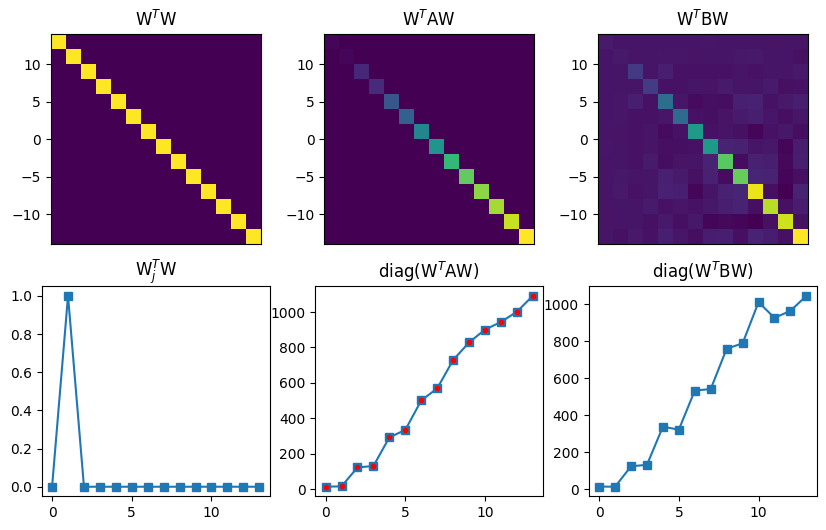

In [ ]:
#generalized eigendecomposition of A
evals,evecs = linalg.eigh(A)
## some plotting

fig = plt.subplots(1,figsize=(10,6))

# W'W
plt.subplot(231)
plt.imshow(evecs.T@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$W')

# one row of W'W
tmp = evecs.T@evecs
plt.subplot(234)
plt.plot(tmp[1,:],'s-')
plt.title('W$_j^T$W')

# W'AW
plt.subplot(232)
plt.imshow(evecs.T@A@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$AW')

# one row of W'AW
plt.subplot(235)
plt.plot(np.diag(evecs.T@A@evecs),'s-')
plt.plot(evals,'r.')
plt.title('diag(W$^T$AW)')

# W'BW
plt.subplot(233)
plt.imshow(evecs.T@B@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$BW')

# diagonal of W'BW
plt.subplot(236)
plt.plot(np.diag(evecs.T@B@evecs),'s-')
plt.title('diag(W$^T$BW)')

plt.show()

## Matrix definiteness, geometry, and eigenvalues

<ipython-input-81-9658916e49b6>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.zeros((5,), dtype=np.object)
<ipython-input-81-9658916e49b6>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


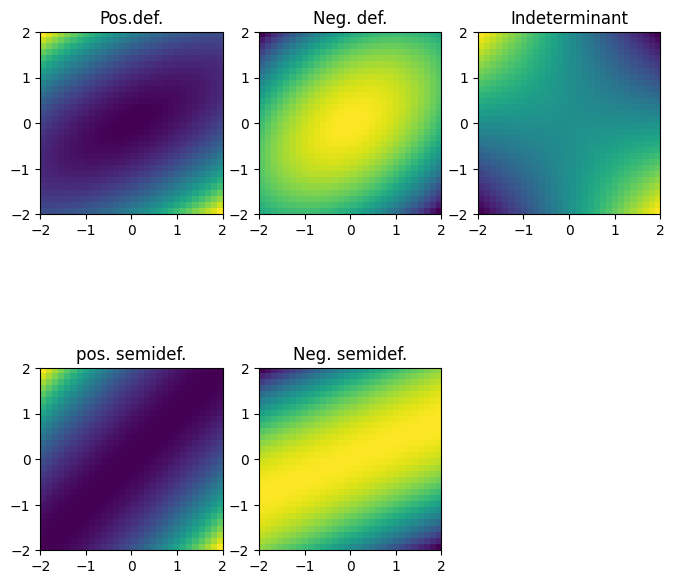

In [ ]:
#some matrices
S = np.zeros((5,), dtype=np.object)

S[0] = [ [4,4], [4,9]]
S[1] = [ [-4,-1],[-3,-5]]
S[2] = [ [0,1],[2,0]]
S[3] = [ [1,1],[1,1]]
S[4] = [ [-1,-2],[-3,-6]]

# range of vector w
n = 30
wr = 2
wi = np.linspace(-wr,wr,n)
qf = np.zeros((n,n))
fig = plt.subplots(1,figsize=(8,8))
for i in range(5):
    for xi in range(n):
        for yj in range(n):
            w = np.transpose([wi[xi],wi[yj]])

            qf[xi,yj] = w.T@S[i]@w

    plt.subplot(2,3,i+1)
    plt.imshow(qf.T, extent=[-2,2,-2,2])

    #compute matrix difiniteness based on eigenvalues
    evals = np.linalg.eig(S[i])[0]

    #we care about their signs
    esign = np.sign(evals)

    # test for signs
    if sum(esign)==2:
      defcat='Pos.def.'
    elif sum(esign) == 1:
      defcat = 'pos. semidef.'
    elif sum(esign)==0:
      defcat = 'Indeterminant'
    elif sum(esign)==-1:
      defcat = 'Neg. semidef.'
    elif sum(esign)==-2:
      defcat = 'Neg. def.'  

    plt.title(defcat)

plt.show()
